<a href="https://colab.research.google.com/github/JaydaBubel/lab-feature-engineering/blob/master/Lab%20Feature%20Engineering%20Week%2015_JaydaB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/learningSet.csv')

Check for null values in the numerical columns.


In [4]:
numerical_columns = data.select_dtypes(include=['number']).columns
nulls_numerical = data[numerical_columns].isnull().sum()
print(nulls_numerical)

ODATEDW         0
TCODE           0
DOB             0
AGE         23665
NUMCHLD     83026
            ...  
TARGET_B        0
TARGET_D        0
HPHONE_D        0
RFA_2F          0
CLUSTER2      132
Length: 407, dtype: int64


Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [20]:
column_data_types = {}

# Populate the dictionary with column names and data types
for col in data.columns:
    column_data_types[col] = str(data[col].dtype)

# Iterate through the dictionary to print category and data type
for column, data_type in sorted(column_data_types.items()):
    print(f"Column: {column}, Data Type: {data_type}")

Column: AC1, Data Type: int64
Column: AC2, Data Type: int64
Column: ADATE_10, Data Type: float64
Column: ADATE_11, Data Type: float64
Column: ADATE_12, Data Type: float64
Column: ADATE_13, Data Type: float64
Column: ADATE_14, Data Type: float64
Column: ADATE_15, Data Type: float64
Column: ADATE_16, Data Type: float64
Column: ADATE_17, Data Type: float64
Column: ADATE_18, Data Type: float64
Column: ADATE_19, Data Type: float64
Column: ADATE_2, Data Type: int64
Column: ADATE_20, Data Type: float64
Column: ADATE_21, Data Type: float64
Column: ADATE_22, Data Type: float64
Column: ADATE_23, Data Type: float64
Column: ADATE_24, Data Type: float64
Column: ADATE_3, Data Type: float64
Column: ADATE_4, Data Type: float64
Column: ADATE_5, Data Type: float64
Column: ADATE_6, Data Type: float64
Column: ADATE_7, Data Type: float64
Column: ADATE_8, Data Type: float64
Column: ADATE_9, Data Type: float64
Column: ADI, Data Type: float64
Column: AFC1, Data Type: int64
Column: AFC2, Data Type: int64
Colum

In [11]:
#fill in missing values with most frequent ocurring value or median
#modes for geocode2, dma, msa and medians for adi, wealth1

In [7]:
mostfrequent_geocode2 = data['GEOCODE2'].mode()[0]
data['GEOCODE2'] = data['GEOCODE2'].fillna(mostfrequent_geocode2)

In [9]:
mostfrequent_dma = data['DMA'].mode()[0]
data['DMA'] = data['DMA'].fillna(mostfrequent_dma)

In [27]:
mode_msa = data['MSA'].mode()[0]
data['MSA'] = data['MSA'].fillna(mode_msa)

In [ ]:
median_adi = data['ADI'].median()
data['ADI'] = data['ADI'].fillna(median_adi)

In [ ]:
median_wealth1 = data['WEALTH1'].median()
data['WEALTH1'] = data['WEALTH1'].fillna(median_wealth1)

In [23]:
column_description = data['GEOCODE2'].describe()

# Print the description of the column
print(column_description)

count     95412
unique        5
top           A
freq      34616
Name: GEOCODE2, dtype: object


Use appropriate EDA technique where ever necessary.

In [35]:
data.shape

(95412, 481)

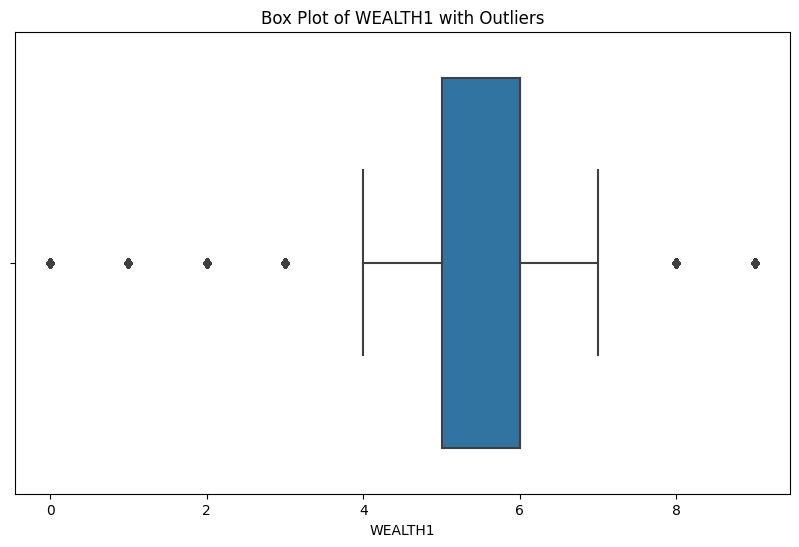

In [44]:
#look at outliers in WEALTH1, would be worth looking deeper into later
column_name = 'WEALTH1'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x=column_name, showfliers=True)
plt.title(f'Box Plot of {column_name} with Outliers')
plt.xlabel(column_name)
plt.show()

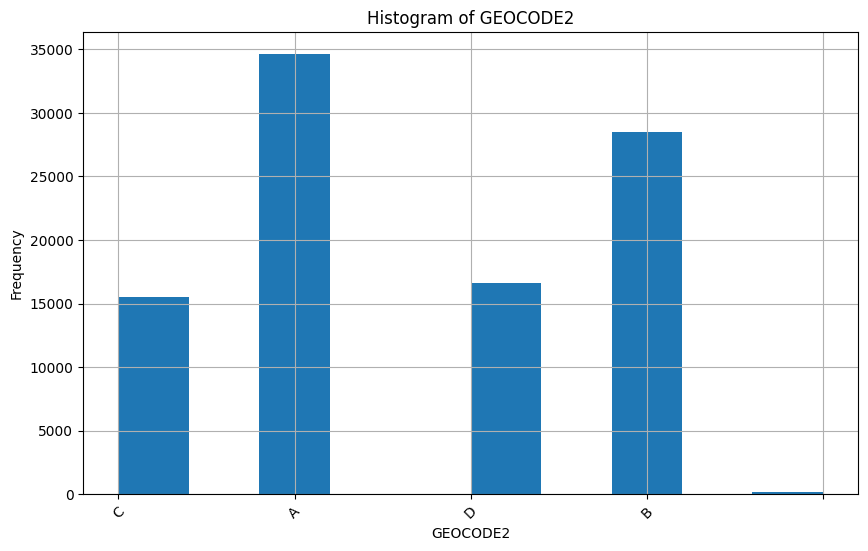

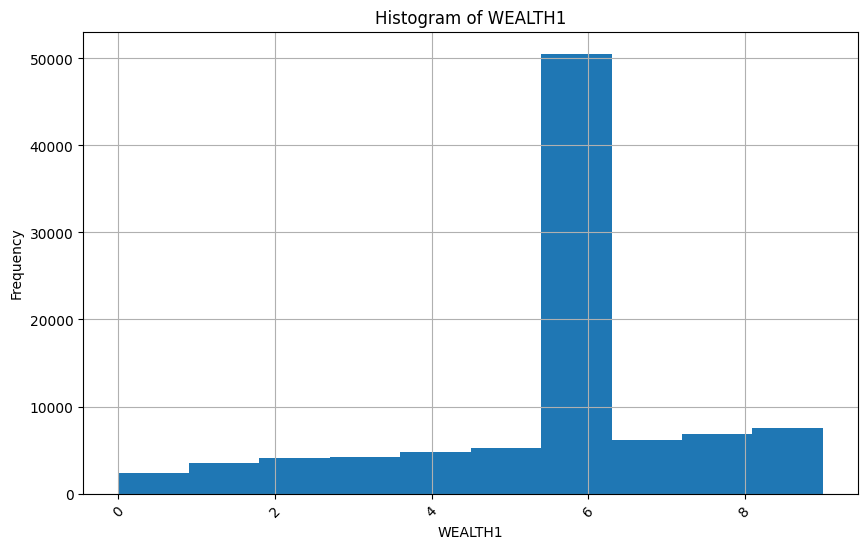

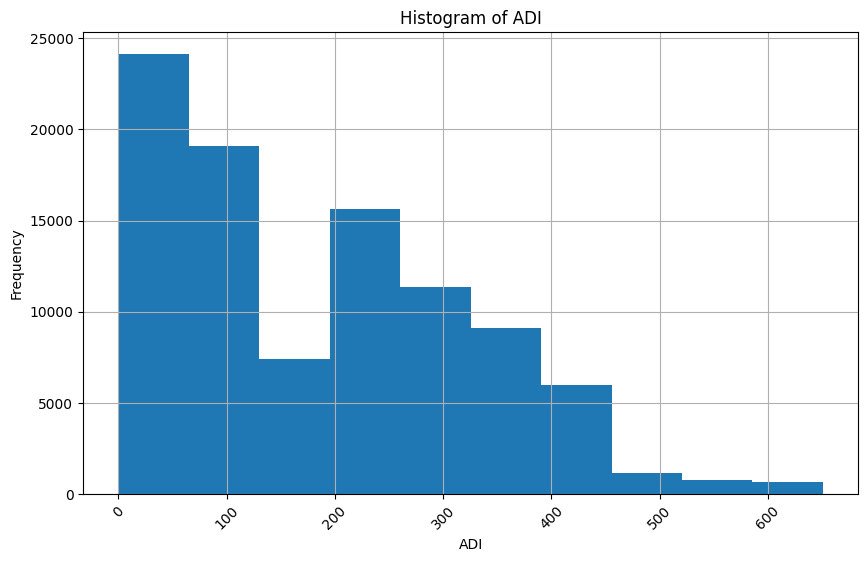

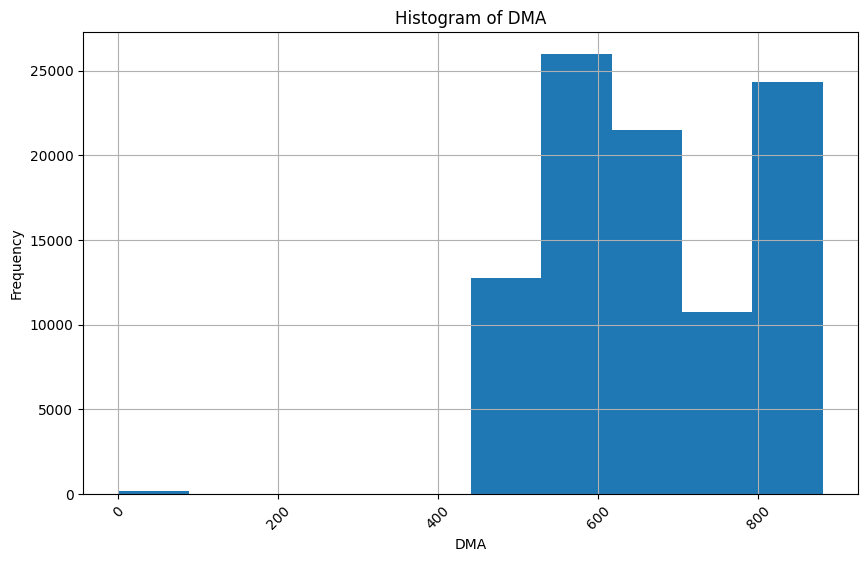

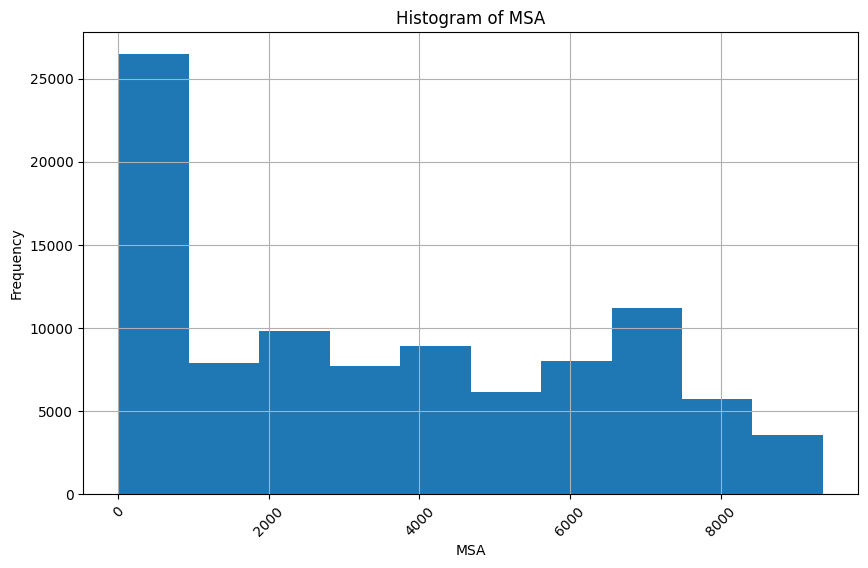

In [42]:
#historgrams of each column
columnsplot = ['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']
for col in columnsplot:
    plt.figure(figsize=(10, 6))
    data[col].hist()
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

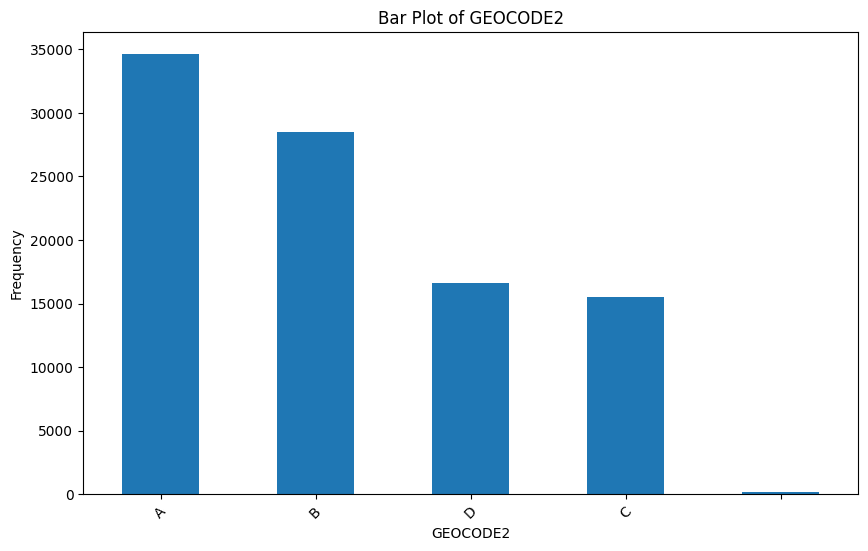

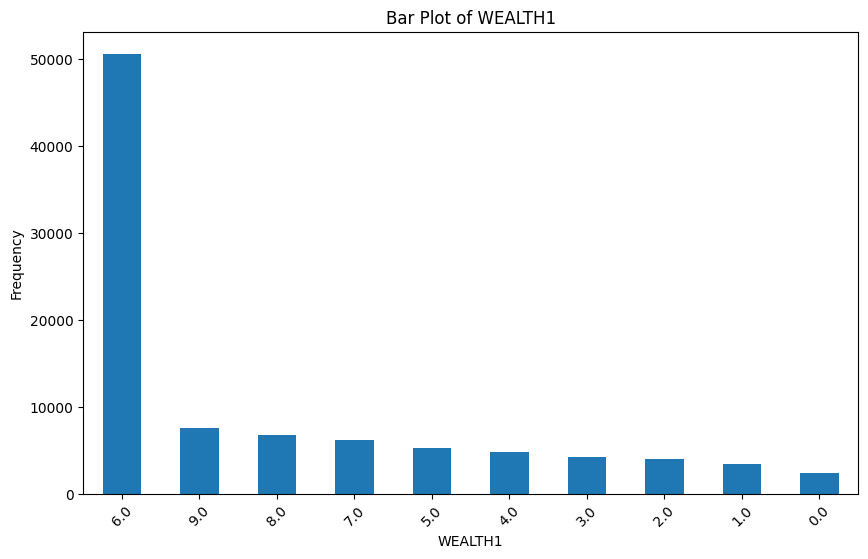

In [43]:
#bar plots for GEOCODE and WELATH1
columnsplot = ['GEOCODE2', 'WEALTH1']

for col in columnsplot:
    plt.figure(figsize=(10, 6))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

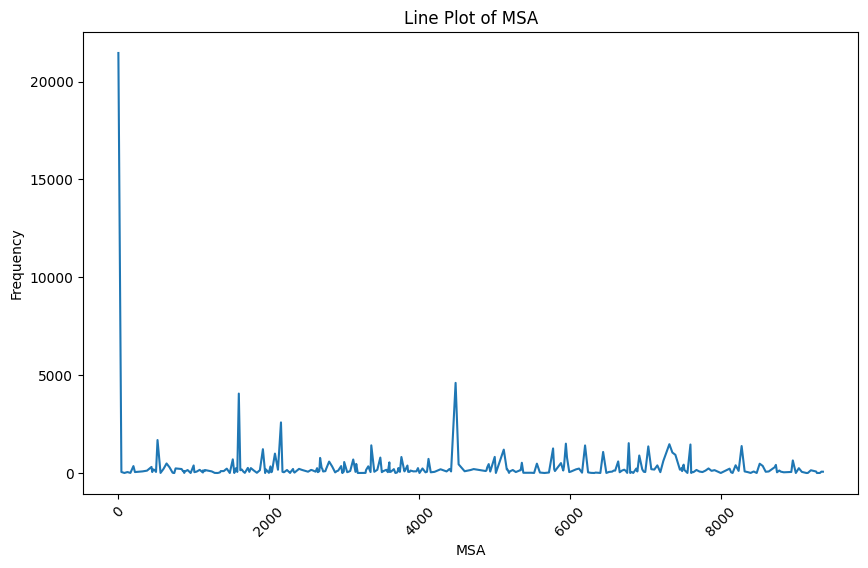

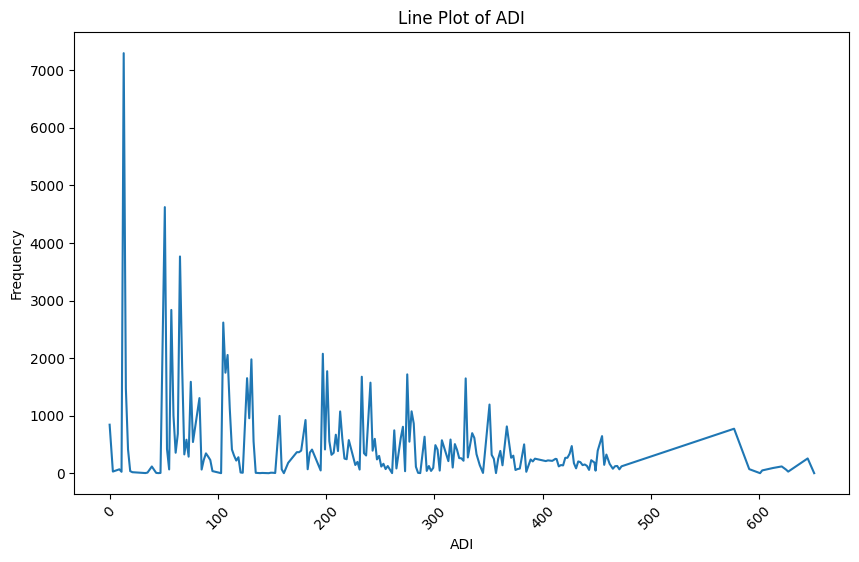

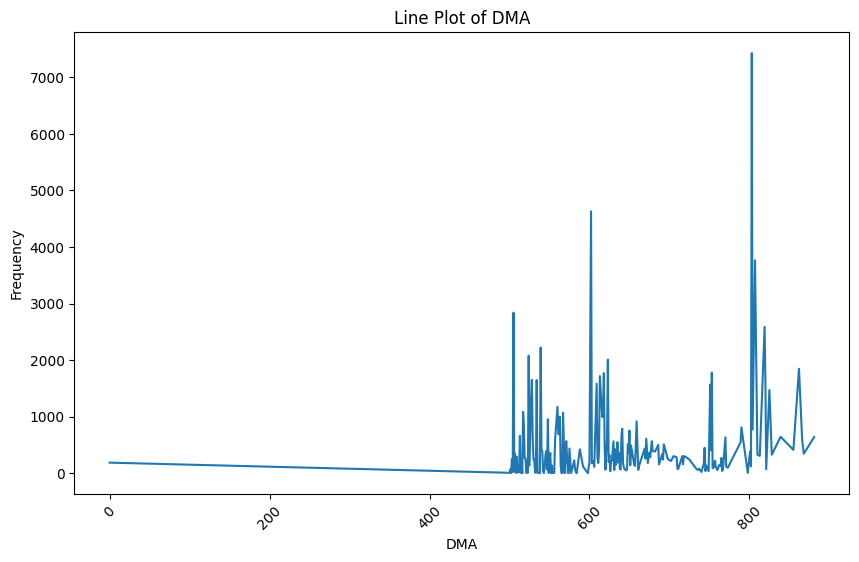

In [40]:
#line plots for MSA, ADI and DMA.
columnsplot = ['MSA', 'ADI', 'DMA']
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    data[col].value_counts().sort_index().plot(kind='line')
    plt.title(f'Line Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()